In [1]:
!pip install citipy


In [2]:
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd

In [3]:
#Grab list of cities based on coordinates from citipy

citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [4]:
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [5]:
import requests as req
import json

In [6]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [7]:
samplecity

,city,country
5686,bihoro,jp
2237,gandorhun,sl
786,guanhaes,br
2999,san mateo del mar,mx
2146,florian,co
317,colesberg,za
7187,bratsk,ru
2034,gamboula,cf
5757,banatski karlovac,rs
4693,linfen,cn


In [8]:
apikey = '7e7540560155efa61fc9ba230b132584'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

This is city#: 1
This is: bihoro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=bihoro
This is city#: 2
This is: gandorhun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=gandorhun
This is city#: 3
This is: guanhaes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=guanhaes
This is city#: 4
This is: san mateo del mar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=san mateo del mar
This is city#: 5
This is: florian
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=florian
This is city#: 6
This is: colesberg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=

This is city#: 48
This is: litovko
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=litovko
No data for this city: tawnat
This is city#: 49
This is: tawnat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=tawnat
This is city#: 50
This is: penzance
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=penzance
This is city#: 51
This is: ojhar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=ojhar
This is city#: 52
This is: anloga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=anloga
This is city#: 53
This is: ngerengere
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

This is city#: 94
This is: cananeia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=cananeia
This is city#: 95
This is: cartagena
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=cartagena
No data for this city: hamadan
This is city#: 96
This is: hamadan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=hamadan
This is city#: 97
This is: les cayes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=les cayes
No data for this city: sholavandan
This is city#: 98
This is: sholavandan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=sholavandan
This is city#: 99
This is: lewiston
This is the req

This is city#: 140
This is: gobo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=gobo
This is city#: 141
This is: bocas del toro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=bocas del toro
This is city#: 142
This is: barda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=barda
This is city#: 143
This is: wyndham
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=wyndham
This is city#: 144
This is: windsor
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=windsor
This is city#: 145
This is: amurzet
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e75405601

This is city#: 186
This is: morro da fumaca
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=morro da fumaca
This is city#: 187
This is: mindelo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=mindelo
This is city#: 188
This is: otradnoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=otradnoye
This is city#: 189
This is: teguise
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=teguise
This is city#: 190
This is: horta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=horta
This is city#: 191
This is: kostino
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appi

This is city#: 232
This is: yilan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=yilan
This is city#: 233
This is: koshurnikovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=koshurnikovo
This is city#: 234
This is: assiniboia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=assiniboia
This is city#: 235
This is: da lat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=da lat
This is city#: 236
This is: porto velho
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=porto velho
This is city#: 237
This is: moratuwa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?a

This is city#: 278
This is: eufaula
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=eufaula
This is city#: 279
This is: nyaunglebin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=nyaunglebin
This is city#: 280
This is: tagusao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=tagusao
This is city#: 281
This is: lowicz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=lowicz
This is city#: 282
This is: tuscaloosa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=tuscaloosa
This is city#: 283
This is: kharovsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7

This is city#: 324
This is: azanka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=azanka
This is city#: 325
This is: baringo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=baringo
This is city#: 326
This is: quimper
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=quimper
This is city#: 327
This is: palmeirais
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=palmeirais
This is city#: 328
This is: shenkursk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=shenkursk
This is city#: 329
This is: puerto rico
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e

This is city#: 370
This is: coroico
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=coroico
This is city#: 371
This is: macomer
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=macomer
This is city#: 372
This is: umba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=umba
No data for this city: erdemli
This is city#: 373
This is: erdemli
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=erdemli
No data for this city: tukrah
This is city#: 374
This is: tukrah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=tukrah
No data for this city: staryy biser
This is city#: 375
This is: staryy biser


This is city#: 416
This is: yima
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=yima
This is city#: 417
This is: balotra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=balotra
This is city#: 418
This is: presidente medici
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=presidente medici
This is city#: 419
This is: montes altos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=montes altos
This is city#: 420
This is: sechura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=sechura
This is city#: 421
This is: santo domingo
This is the requested URL: http://api.openweathermap.org/data/2.

This is city#: 462
This is: burlington
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=burlington
This is city#: 463
This is: fort saint james
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=fort saint james
This is city#: 464
This is: moindou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=moindou
This is city#: 465
This is: malangali
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=malangali
This is city#: 466
This is: polunochnoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e7540560155efa61fc9ba230b132584&units=Imperial&q=polunochnoye
This is city#: 467
This is: morro bay
This is the requested URL: http://api.openweathermap.o

In [9]:
samplecity = samplecity[samplecity.latitude != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
5686,bihoro,jp,43,43,36,59,75,5
2237,gandorhun,sl,8,8,72,94,8,4
786,guanhaes,br,-18,-18,66,91,0,2
2999,san mateo del mar,mx,16,16,77,91,0,36
2146,florian,co,48,48,19,78,1,9
317,colesberg,za,-30,-30,47,64,0,3
7187,bratsk,ru,56,56,-2,77,24,8
2034,gamboula,cf,4,4,68,97,24,6
5757,banatski karlovac,rs,45,45,48,81,0,10
4693,linfen,cn,36,36,64,66,0,3


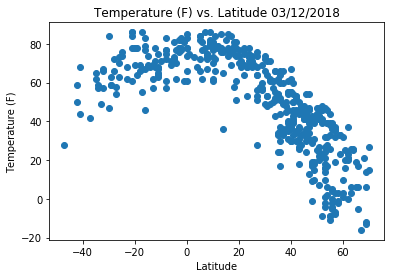

In [10]:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

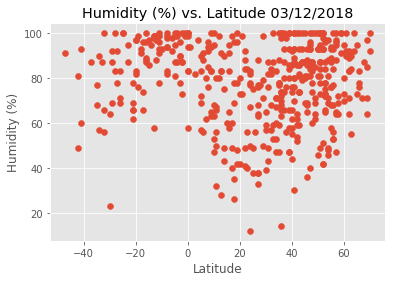

In [11]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

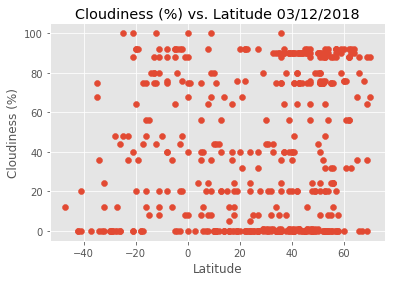

In [12]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

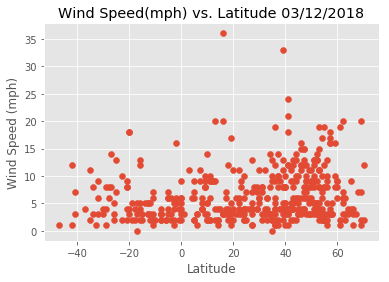

In [15]:
# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

In [14]:
#samplecity = samplecity[samplecity.latitude != ""]
#above works to remove blank answers
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,bihoro,jp,43,43,36,59,75,5
1,gandorhun,sl,8,8,72,94,8,4
2,guanhaes,br,-18,-18,66,91,0,2
3,san mateo del mar,mx,16,16,77,91,0,36
4,florian,co,48,48,19,78,1,9


In [ ]:
#OBSERVABLE TRENDS BASED ON DATA: 
    
# The higher the latitude for some cities, the more cities get clustered in having colder temperatures with some outliers coming from negative latitude (or the extreme side of latitude --- two poles of the Earth). The Temperature vs Latitude data seems to show a normal curve-like pattern, illustrating cities with warmer temperatures get clustered in the 0 latitude (also known as the equator).


# High humidity seems to clustered in cities with having higher latitude, yet it also shows a pretty scattered experience of humidity around different latitude zones.


# The relationship of Cloudiness vs. Latitude is pretty scattered with no definitive pattern across latitude. Wind Speed is also pretty scattered along the Latitude area with wind speed varying mostly between 0 to 20 mph."""